In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
plt.rcParams['font.size'] = 25

In [ ]:
selectsensor = SelectSensor(grid_len=50)
selectsensor.init_data('data50/homogeneous-200/cov', 'data50/homogeneous-200/sensors', 'data50/homogeneous-200/hypothesis')
num_of_intruders = 5
    #true_powers = [-2, -1, 0, 1, 2]
    #true_powers = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
    #true_powers = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # no varing power
    #selectsensor.vary_power(true_powers)
    #selectsensor.init_data('data50/homogeneous-625/cov', 'data50/homogeneous-625/sensors', 'data50/homogeneous-625/hypothesis')
    #selectsensor.init_data('data50/homogeneous-75-4/cov', 'data50/homogeneous-75-4/sensors', 'data50/homogeneous-75-4/hypothesis')

a, b = 0, 50
errors = []
misses = []
false_alarms = []
power_errors = []
proc_1_ratio = 0
start = time.time()
for i in range(a, b):
    print('\n\nTest ', i)
    random.seed(i)
    true_powers = [random.uniform(-2, 2) for i in range(num_of_intruders)]
    #print(true_powers)
    random.seed(i)
    np.random.seed(i)
    true_indices, true_powers = generate_intruders(grid_len=selectsensor.grid_len, edge=2, num=num_of_intruders, min_dist=1, powers=true_powers)

    intruders, sensor_outputs = selectsensor.set_intruders(true_indices=true_indices, powers=true_powers, randomness=True)
    pred_locations, pred_power, ratio = selectsensor.our_localization(sensor_outputs, intruders, i)
    proc_1_ratio += ratio
    true_locations = selectsensor.convert_to_pos(true_indices)

    try:
        error, miss, false_alarm, power_error = selectsensor.compute_error(true_locations, true_powers, pred_locations, pred_power)
        if error >= 0:
            errors.append(error)
            power_errors.append(abs(power_error))
        misses.append(miss)
        false_alarms.append(false_alarm)
        print('error/miss/false/power = {}/{}/{}/{}'.format(error, miss, false_alarm, power_error) )
        visualize_localization(selectsensor.grid_len, true_locations, pred_locations, i)
    except Exception as e:
        print(e)

try:
    print('(mean/max/min) error=({}/{}/{}), miss=({}/{}/{}), false_alarm=({}/{}/{}), power=({}/{}/{})'.format(round(sum(errors)/len(errors), 3), round(max(errors), 3), round(min(errors), 3), \
          round(sum(misses)/(b-a), 3), max(misses), min(misses), round(sum(false_alarms)/(b-a), 3), max(false_alarms), min(false_alarms), round(sum(power_errors)/len(power_errors), 3), round(max(power_errors), 3), round(min(power_errors), 3) ) )
    print('Ours! time = ', round(time.time()-start, 3), '; proc 1 ratio =', round(proc_1_ratio/(b-a), 3))
except Exception as e:
    print(e)
print('true power continuous, during localization continuous power, have noise')

In [141]:
mean1 = (20, 35, 30, 35, 27) # our-miss
mean2 = (25, 32, 34, 20, 25) # our-false alarm
std1  = (2, 3, 4, 1, 2)
std2  = (3, 5, 2, 3, 3)

mean3 = (10, 20, 30, 20, 10) # SPLOT-miss
mean4 = (15, 25, 20, 15, 15) # SPLOT-false
std3  = (2, 3, 4, 1, 2)
std4  = (3, 5, 2, 3, 3)

mean5 = (14, 23, 31, 16, 11) # CLUSTER-miss
mean6 = (12, 22, 21, 16, 14) # CLUSTER-false
std5  = (2, 3, 4, 1, 2)
std6  = (3, 5, 2, 3, 3)

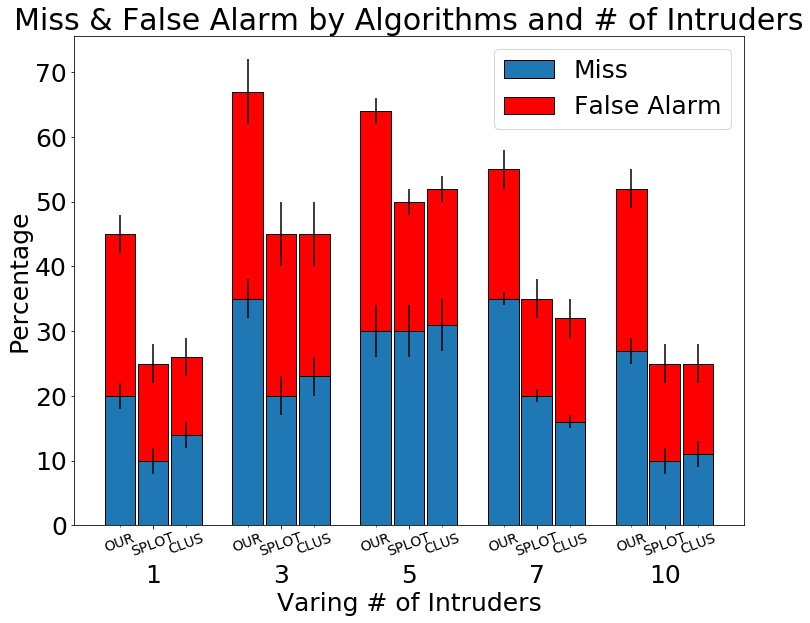

In [140]:
plt.figure(figsize=(12, 9))

N     = 5
ind   = np.arange(N)    # the x locations for the groups
width = 0.24       # the width of the bars: can also be len(x) sequence
b     = 'tab:blue'

pos1 = ind-width-0.02   # position of algo-1's bar
pos2 = ind              # position of algo-2's bar
pos3 = ind+width+0.02   # position of algo-3's bar

p1 = plt.bar(pos1, mean1, width, yerr=std1, color= b,  edgecolor='black', label='Miss')
p2 = plt.bar(pos1, mean2, width, yerr=std2, color='r', edgecolor='black', bottom=mean1, label='False Alarm')

p3 = plt.bar(pos2, mean3, width, yerr=std3, color= b,  edgecolor='black')
p4 = plt.bar(pos2, mean4, width, yerr=std4, color='r', edgecolor='black', bottom=mean3)

p5 = plt.bar(pos3, mean5, width, yerr=std5, color= b,  edgecolor='black')
p6 = plt.bar(pos3, mean6, width, yerr=std6, color='r', edgecolor='black', bottom=mean5)

minor_pos = np.concatenate((pos1, pos2, pos3))
minor_lab = ['OUR']*5 + ['SPLOT']*5 + ['CLUS']*5
ax = plt.gca()
ax.set_xticks(minor_pos, minor=True)
ax.set_xticklabels(minor_lab, minor=True, fontsize=14, rotation=20)

plt.xticks(ind, ('1', '3', '5', '7', '10'))
plt.xlabel('Varing # of Intruders')
ax.tick_params(axis='x', which='major', pad=35)

plt.legend()
plt.ylabel('Percentage')
plt.title('Miss & False Alarm by Algorithms and # of Intruders')
plt.savefig('miss-false.png')